## **Índice:**
* Introdução
* O RMS Titanic
* Importando as bibliotecas
* Obtendo os dados
* Exploração/Análise de Dados
* Pré-processamento dos dados
    - Dados ausentes
    - Convertendo os parametros
    - Criando Categorias
    - Criando novos parametros
* Construção dos Modelos de Machine Learning
    - Treinando 8 modelos diferentes
    - Qual é o melhor modelo?
    - K-Fold Cross Validation
* Random Forest 
    - O que é Random Forest ?
    - Parametros importantes
    - Ajuste de hiperparâmetros   
* Avaliação adicional 
    - Matriz de Confusão
    - Precisão e Recall 
    - F-Score
    - Curva de Rechamada de Precisão
    - Curva ROC AUC
    - ROC AUC Score
* Submissão
* Resumo

# **Introdução**

Neste notebook eu vou passar por todo o processo de criação de um modelo de aprendizado de máquina no famoso conjunto de dados Titanic, que é usado por muitas pessoas em todo o mundo. Ele fornece informações sobre o destino dos passageiros no Titanic, resumidos de acordo com o status econômico (classe), sexo, idade e sobrevivência. Neste desafio, somos solicitados a prever se um passageiro do Titanic teria sobrevivido ou não.

# **O RMS Titanic**

O RMS Titanic era um navio de passageiros britânico que afundou no Oceano Atlântico Norte nas primeiras horas da manhã de 15 de abril de 1912, após colidir com um iceberg durante sua viagem inaugural de Southampton para a cidade de Nova York. Havia um número estimado de 2.224 passageiros e tripulantes a bordo do navio, e mais de 1.500 morreram, tornando-se um dos mais mortais desastres marítimos comerciais em tempos de paz da história moderna. O RMS Titanic foi o maior navio à tona na época em que entrou em operação e foi o segundo de três transatlânticos de classe olímpica operados pela White Star Line. O Titanic foi construído pelo estaleiro Harland and Wolff em Belfast. Thomas Andrews, seu arquiteto, morreu no desastre.

![Titanic](https://www.cruisemapper.com/images/news/3956-21b7ab89728.jpg)

# **Importando as bibliotecas**

In [2]:
#Algebra Linear
import numpy as np 

# Processamento/manipulação dos dados
import pandas as pd 

# Visualização dos dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#Algoritimos Machine Learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# **Obtendos os dados**

In [6]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# **Exploração/Análise de Dados**

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


** O conjunto de treinamento tem 891 exemplos e 11 características + a variável de destino (Survived) **. 2 dos recursos são floats, 5 são inteiros e 5 são objetos. Abaixo listei os recursos com uma breve descrição:

    survival:	Sobrevivente
    PassengerId: ID único de um passageiro
    pclass:	Classe de bilhetes	
    sex:	Sexo
    Age:	Idade em anos	
    sibsp:	Número de irmãos / cônjuges a bordo do Titanic	
    parch:	Número de pais / filhos a bordo do Titanic	
    ticket:	Numero do bilhete	
    fare:	Tarifa de passageiros	
    cabin:	Número de cabine	
    embarked:	Porto de embarcação

In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Acima podemos ver que **38% do conjunto de treinamento sobreviveu ao Titanic**. Também podemos ver que as idades dos passageiros variam de 0,4 a 80. Além disso, já podemos detectar alguns recursos que contêm valores ausentes, como o recurso "Idade".

In [7]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Em nosso dataset acima, podemos notar algumas coisas. Em primeiro lugar, precisamos **converter muitos recursos em numéricos**, mais tarde, para que os algoritmos de aprendizado de máquina possam processá-los. Além disso, podemos ver que os recursos do **têm intervalos muito diferentes**, que precisaremos converter em aproximadamente na mesma escala. Também podemos detectar mais alguns recursos, que contêm valores ausentes (NaN = não um número), que precisam ser tratados.

**Vamos dar uma olhada mais detalhada em quais dados estão realmente ausentes:**

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


O recurso Embarcado tem apenas dois valores ausentes, que podem ser facilmente preenchidos. Será muito mais complicado lidar com o recurso 'Age', que tem 177 valores em falta. O recurso 'Cabin' precisa de uma investigação mais aprofundada, mas provavelmente removeremos do conjunto de dados, já que 77% dele está faltando.

In [9]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Acima você pode ver os 11 recursos + a variável de destino (sobreviveu). ** Quais recursos podem contribuir para uma alta taxa de sobrevida? **

Para mim, faria sentido se tudo, exceto 'PassengerId', 'Ticket' e 'Name', fosse correlacionado com uma alta taxa de sobrevivência.

**1. Idade e Sexo:**

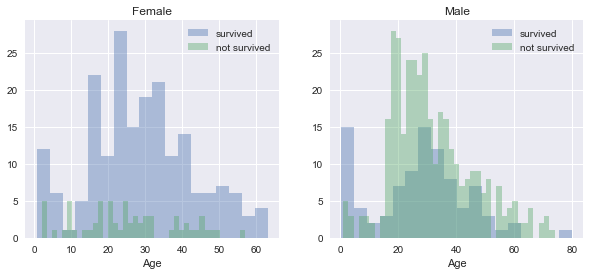

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Você pode ver que os homens têm uma alta probabilidade de sobrevivência quando têm entre 18 e 30 anos, o que também é um pouco verdadeiro para as mulheres, mas não totalmente. Para as mulheres, as chances de sobrevivência são maiores entre 14 e 40 anos.

Para os homens, a probabilidade de sobrevivência é muito baixa entre os 5 e os 18 anos, mas isso não é verdade para as mulheres. Outra coisa a notar é que os bebês também têm uma probabilidade um pouco maior de sobrevivência.

Uma vez que parece haver **algumas idades, que aumentaram as chances de sobrevivência** e porque eu quero que todos os recursos estejam mais ou menos na mesma escala, criaremos grupos etários mais tarde.

**3. Embarcação, Classes de bilhetes e Sexo:**

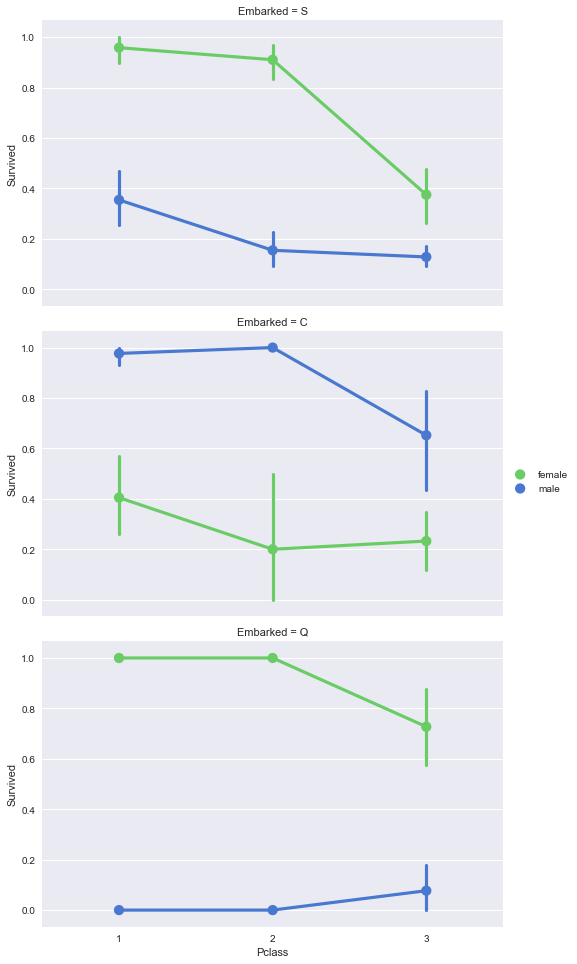

In [15]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette="muted",  order=None, hue_order=None )
FacetGrid.add_legend()

**Embarked** parece estar correlacionada com a sobrevivência, dependendo do sexo.

As mulheres na porta Q e na porta S têm maior chance de sobrevivência. O inverso é verdadeiro, se estiverem na porta C. Os homens têm uma alta probabilidade de sobrevivência se estiverem na porta C, mas uma probabilidade baixa se estiverem na porta Q ou S.

**Pclass** também parece estar correlacionado com a sobrevivência. Vamos gerar outro gráfico abaixo.

**4. Pclass:**

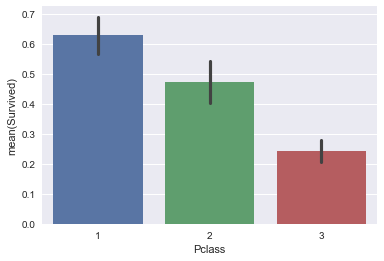

In [16]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

Aqui vemos claramente que a **Pclass** está contribuindo para a chance de sobrevivência de uma pessoa, especialmente se essa pessoa está na classe 1. Vamos criar outra plotagem de **Pclass** abaixo.

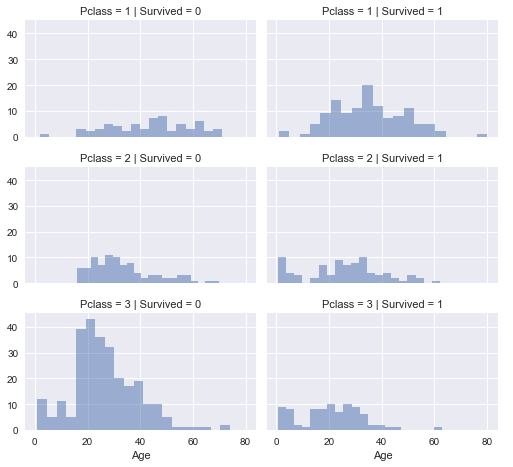

In [17]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

O gráfico acima confirma nossa suposição sobre a **PClass** 1, mas também podemos identificar uma alta probabilidade de que uma pessoa na pclasse 3 não sobreviva.

**5.  SibSp and Parch:**

SibSp e Parch faria mais sentido como uma característica combinada, que mostra o número total de parentes, uma pessoa tem no Titanic. Vou criá-lo abaixo e também um recurso que semeia se alguém não está sozinho.

In [18]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

In [19]:
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

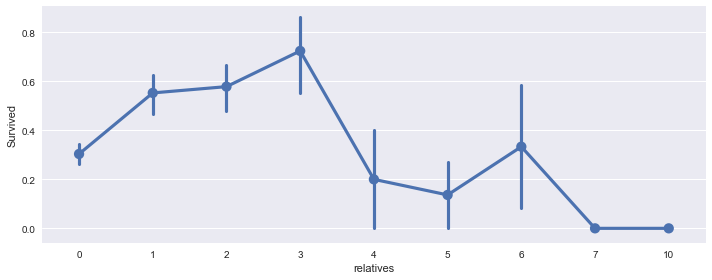

In [20]:
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, )

Aqui podemos ver que temos uma alta probabilidade de sobrevivência com 1 a 3 parentes, mas uma menor probabilidade se você tem menos de 1 ou mais de 3 (exceto em alguns casos com 6 parentes).

# **Pré-Processamento de Dados**

Primeiro, vamos remover **'PassengerId'** do conjunto de treino, porque isso não contribui para a probabilidade de sobrevivência de uma pessoa. Eu não vou soltá-lo do conjunto de testes, já que é necessário para o envio

In [21]:
train_df = train_df.drop(['PassengerId'], axis=1)

## Dados Ausentes:
### Cabine:
Como lembrete, temos que lidar com a Cabine (687), Embarcou (2) e Idade (177).

Primeiro eu lembrei, que deveriamos deletar a variável **'Cabin'** mas então eu achei algo interessante. Um número de cabine que se parece com "C123" e a letra "** refere-se ao convés **.

Portanto, vamos extraí-los e criar um novo recurso que contenha um deck de pessoas. Depois, converteremos o recurso em uma variável numérica. Os valores ausentes serão convertidos em zero.

Na foto abaixo você pode ver os decks atuais do Titanic, variando de A a G.
![titanic decks](http://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/687px-Titanic_cutaway_diagram.png)

In [22]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int) 

In [23]:
# Agora podemos excluir a variavel cabine
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

### Age:

Agora podemos resolver o problema com os valores ausentes da faixa etária. Vou criar uma matriz que contém números aleatórios, que são calculados com base no valor médio de idade em relação ao **desvio padrão e is_null**.

In [24]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # computar números aleatórios entre a média, std e is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preencher valores NaN na coluna Idade com valores aleatórios gerados
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

In [25]:
train_df["Age"].isnull().sum()

0

### Embarked:

Como a coluna **Embarked** tem apenas dois valores ausentes, apenas os preencheremos com o mais comum.

In [26]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [27]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

## Convertendo os Parametros:

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.1+ KB


Acima você pode ver que **'Fare'** é um float e nós temos que lidar com 4 características categóricas: Nome, Sexo, Ticket e Embarked. Vamos investigar e transformar um após o outro.

### Fare:

Convertendo **"Fare"** de float para int64, usando a função "astype ()", o pandas fornece:

In [29]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Name:
Usaremos o recurso **Name** para extrair os Títulos do Nome, para que possamos criar um novo recurso a partir disso.

In [30]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extraindo os titulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # substituir títulos com um título mais comum ou como Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # converter títulos em números
    dataset['Title'] = dataset['Title'].map(titles)
    # Inserindo o 0 nos campos NaN 
    dataset['Title'] = dataset['Title'].fillna(0)

In [31]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

### Sex:

Convertendo **'Sex'** em numérico.

In [32]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### Ticket:

In [33]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Como o atributo Ticket temos 681 tickets únicos, será um pouco complicado convertê-los em categorias úteis. Então vamos remove-los do conjunto de dados.

In [34]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### Embarked:
Convertendo **'Embarked'** em numerico.

In [35]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Creating Categories:

We will now create categories within the following features:

### Age:
Now we need to convert the 'age' feature. First we will convert it from float into integer. Then we will create the new 'AgeGroup" variable, by categorizing every age into a group. Note that it is important to place attention on how you form these groups, since you don't want for example that 80% of your data falls into group 1.

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [ ]:
# let's see how it's distributed
train_df['Age'].value_counts()

### Fare:
For the 'Fare' feature, we need to do the same as with the 'Age' feature.  But it isn't that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn "qcut()" function, that we can use to see, how we can form the categories.

In [ ]:
train_df.head(10)

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Creating new Features

I will add two new features to the dataset, that I compute out of other features.

### 1. Age times Class

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

### 2.  Fare per Person

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [ ]:
# Let's take a last look at the training set, before we start training the models.
train_df.head(20)

# **Building Machine Learning Models**

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

In [ ]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)


print(round(acc_sgd,2,), "%")

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
print(round(acc_log,2,), "%")

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(round(acc_knn,2,), "%")

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print(round(acc_gaussian,2,), "%")

In [ ]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")

In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(round(acc_linear_svc,2,), "%")

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(round(acc_decision_tree,2,), "%")

##  Which is the best Model ?

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation. 

## K-Fold Cross Validation:

K-Fold Cross Validation randomly splits the training data into **K subsets called folds**. Let's image we would split our data into 4 folds (K = 4).  Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds. 

The image below shows the process, using 4 folds (K = 4). Every row represents one training + evaluation process. In the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.


![cross-v.](https://img3.picload.org/image/ddwrppcl/bildschirmfoto2018-02-02um10.0.png)

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores. 

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores.

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

This looks much more realistic than before.  Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are . 

This means in our case that the accuracy of our model can differ **+ -** 4%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it's performance even further in the following section.

# **Random Forest**

## What is Random Forest ?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems.  With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself. 

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Below you can see how a random forest would look like with two trees:

![picture](https://img3.picload.org/image/dagpgdpw/bildschirmfoto-2018-02-06-um-1.png)

## Feature Importance

Another great quality of random forest is that  they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results  so that the sum of all importances is equal to 1.  We will acces this below:

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.head(15)

In [ ]:
importances.plot.bar()

**Conclusion:**

not_alone and Parch doesn't play a significant role in our random forest classifiers prediction process. Because of that I will drop them from the dataset and train the classifier again. We could also remove more or less features, but this would need a more detailed investigation of the features effect on our model. But I think it's just fine to remove only Alone and Parch.

In [ ]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

**Training random forest again:**

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Our random forest model predicts as good as it did before. A general rule is that,  **the more features you have, the more likely your model will suffer from overfitting** and vice versa. But I think our data looks fine for now and hasn't too much features.

There is also another way to evaluate a random-forest classifier, which is probably much more accurate than the score we used before. What I am talking about is the **out-of-bag samples** to estimate the generalization accuracy. I will not go into details here about how it works. Just note that out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

Now we can start tuning the hyperameters of random forest. 

## Hyperparameter Tuning

Below you can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators. 

I put this code into a markdown cell and not into a code cell, because it takes a long time to run it. Directly underneeth it, I put a screenshot of the gridsearch's output.

param_grid = { "criterion" : ["gini", "entropy"], 
              "min_samples_leaf" : [1, 5, 10, 25, 50, 70], 
              "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], 
              "n_estimators": [100, 400, 700, 1000, 1500]}


from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid,
                    n_jobs=-1)

clf.fit(X_train, Y_train)        

clf.best_params_

![GridSearch Output](https://img2.picload.org/image/ddwglili/bildschirmfoto2018-02-01um15.4.png)

**Test new paramters:**

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

Now that we have a proper model, we can start evaluating it's performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it's more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

# **Further Evaluation**



## Confusion Matrix:

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

The first row is about the not-survived-predictions: **493 passengers were correctly classified as not survived** (called true negatives)  and **56 where wrongly classified as not survived** (false negatives).

The second row is about the survived-predictions: **93 passengers where wrongly classified as survived** (false positives) and **249 where correctly classified as survived** (true positives).

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

## Precision and Recall:

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Our model predicts 81% of the time, a passengers survival correctly (precision). The recall tells us that it predicted the survival of 73 % of the people who actually survived. 

## F-Score

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [ ]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

There we have it, a 77 % F-score. The score is not that high, because we have a recall of 73%.

But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall. This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. We will discuss this in the following section.


## Precision Recall Curve

For each person the Random Forest algorithm has to classify, it computes a probability based on a function and it classifies the person as survived (when the score is bigger the than threshold) or as not survived (when the score is smaller than the threshold). That's why the threshold plays an important part.

We will plot the precision and recall with the threshold using matplotlib:

In [ ]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

In [ ]:
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Above you can clearly see that the recall is falling of rapidly at a precision of around 85%.  Because of that you may want to select the precision/recall tradeoff before that - maybe at around 75 %.

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4.  Then you could train a model with exactly that threshold and would get the desired accuracy.


Another way is to plot the precision and recall against each other:

In [ ]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

## ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

In [ ]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)

In [ ]:
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely random classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our Random Forest model seems to do a good job. 

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is. 

## ROC AUC Score
The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC. 

A classifiers that is 100% correct, would have a ROC AUC Score of 1 and a completely random classiffier would have a score of 0.5.

In [ ]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

Nice ! I think that score is good enough to submit the predictions for the test-set to the Kaggle leaderboard.

# **Submission**

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_prediction
    })
submission.to_csv('submission.csv', index=False)

# **Summary**

This project deepened my machine learning knowledge significantly and I strengthened my ability to apply concepts that I learned from textbooks, blogs and various other sources, on a different type of problem. This project had a heavy focus on the data preparation part, since this is what data scientists work on most of their time. 

I started with the data exploration where I got a feeling for the dataset, checked about missing data and learned which features are important. During this process I used seaborn and matplotlib to do the visualizations. During the data preprocessing part, I computed missing values, converted features into numeric ones, grouped values into categories and created a few new features. Afterwards I started training 8 different machine learning models, picked one of them (random forest) and applied cross validation on it. Then I explained how random forest works, took a look at the importance it assigns to the different features and tuned it's performace through optimizing it's hyperparameter values.  Lastly I took a look at it's confusion matrix and computed the models precision, recall and f-score, before submitting my predictions on the test-set to the Kaggle leaderboard.

Below you can see a before and after picture of the train_df dataframe:

![Titanic](https://img1.picload.org/image/dagldoor/before_after.png)


Of course there is still room for improvement, like doing a more extensive feature engineering, by comparing and plotting the features against each other and identifying and removing the noisy features. Another thing that can improve the overall result on the kaggle leaderboard would be a more extensive hyperparameter tuning on several machine learning models. Of course you could also do some ensemble learning.